# Imports for colab

In [1]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


# Import Dataset

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/sample_two_datasets_hit_column.csv')

In [5]:
data.columns

Index(['lyrics', 'genre', 'num_syllables', 'pos', 'year', 'fog_index',
       'flesch_index', 'num_lines', 'sentiment', 'title', 'f_k_grade',
       'artist', 'difficult_words', 'num_dupes', 'number_of_tokens',
       'number_of_types', 'decades', 'stemmed_text', 'POS_tags', 'POS',
       'playlistID', 'TrackName', 'TrackID', 'SampleURL', 'ReleaseYear',
       'Genres', 'danceability_x', 'energy_x', 'loudness_x', 'speechiness_x',
       'acousticness_x', 'instrumentalness_x', 'liveness_x', 'valence_x',
       'tempo_x', 'key_x', 'mode_x', 'duration_ms_x', 'Popularity', 'values',
       'pred', 'label', 'score', 'emotion_label', 'Hit_x', 'uri',
       'danceability_y', 'energy_y', 'key_y', 'loudness_y', 'mode_y',
       'speechiness_y', 'acousticness_y', 'instrumentalness_y', 'liveness_y',
       'valence_y', 'tempo_y', 'duration_ms_y', 'time_signature', 'chorus_hit',
       'sections', 'target', 'Hit_y'],
      dtype='object')

In [6]:
data = data.drop(['genre', 'num_syllables', 'pos', 'year', 'fog_index',
       'flesch_index', 'num_lines', 'sentiment','f_k_grade', 'difficult_words', 'num_dupes', 'number_of_tokens',
       'number_of_types', 'decades', 'stemmed_text', 'POS_tags', 'POS','values', 'pred', 'playlistID', 'TrackName',
        'TrackID', 'SampleURL', 'ReleaseYear', 'Genres', 'danceability_x', 'energy_x', 'loudness_x', 'speechiness_x',
       'acousticness_x', 'instrumentalness_x', 'liveness_x', 'valence_x', 'tempo_x', 'key_x', 'mode_x', 'duration_ms_x',
        'Popularity', 'score'], axis=1)

In [7]:
data.columns

Index(['lyrics', 'title', 'artist', 'label', 'emotion_label', 'Hit_x', 'uri',
       'danceability_y', 'energy_y', 'key_y', 'loudness_y', 'mode_y',
       'speechiness_y', 'acousticness_y', 'instrumentalness_y', 'liveness_y',
       'valence_y', 'tempo_y', 'duration_ms_y', 'time_signature', 'chorus_hit',
       'sections', 'target', 'Hit_y'],
      dtype='object')

In [8]:
data.head(5)

,lyrics,title,artist,label,emotion_label,Hit_x,uri,danceability_y,energy_y,key_y,...,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,time_signature,chorus_hit,sections,target,Hit_y
0,look into my eyes you will seewhat you mean t...,(Everything I Do) I Do It For You,Bryan Adams,POSITIVE,joy,Yes,spotify:track:6eBK3edMW7bEzecF1eCezc,0.526,0.365,1,...,0.000013,0.0618,0.253,131.253,394133,4,27.33440,16,1,Yes
1,our life together is so precious togetherwe ha...,(Just Like) Starting Over,John Lennon,POSITIVE,joy,Yes,spotify:track:5y0YreEOnQiKFAnCrcFIXz,0.701,0.790,9,...,0.000061,0.1790,0.421,99.104,236547,4,23.90755,10,1,Yes
2,love is higher than a mountain love is thicker...,(Love Is) Thicker Than Water,Andy Gibb,POSITIVE,sadness,Yes,spotify:track:5WdF8jm3hBNi1t9qlqdjsE,0.582,0.462,6,...,0.000050,0.0755,0.528,96.361,255960,4,45.24204,15,1,Yes
3,sittin' in the morning suni'll be sittin' when...,(Sittin' On) The Dock Of The Bay,Otis Redding,NEGATIVE,joy,Yes,spotify:track:3zBhihYUHBmGd2bcQIobrF,0.769,0.367,2,...,0.000016,0.0810,0.535,103.621,163756,4,25.57982,9,1,Yes
4,why do birds suddenly appeareverytime you are ...,(They Long To Be) Close To You,Carpenters,POSITIVE,joy,Yes,spotify:track:50q2aUjWoTn6CJIfSPRJQA,0.533,0.245,8,...,0.000042,0.1220,0.236,89.328,276000,4,36.98647,10,1,Yes


In [9]:
from collections import Counter

Counter(data.Hit_x)

Counter({'Yes': 550, 'No': 566})

In [10]:
from collections import Counter

Counter(data.Hit_y)

Counter({'Yes': 550, 'No': 566})

In [11]:
from collections import Counter

Counter(data.target)

Counter({1: 1114, 0: 2})

In [12]:
data = data.drop(['Hit_x', 'target'], axis=1)

In [13]:
data.columns

Index(['lyrics', 'title', 'artist', 'label', 'emotion_label', 'uri',
       'danceability_y', 'energy_y', 'key_y', 'loudness_y', 'mode_y',
       'speechiness_y', 'acousticness_y', 'instrumentalness_y', 'liveness_y',
       'valence_y', 'tempo_y', 'duration_ms_y', 'time_signature', 'chorus_hit',
       'sections', 'Hit_y'],
      dtype='object')

# Check for null values

In [14]:
df = data.copy()

In [15]:
df.isna().sum()

lyrics                0
title                 0
artist                0
label                 0
emotion_label         0
uri                   0
danceability_y        0
energy_y              0
key_y                 0
loudness_y            0
mode_y                0
speechiness_y         0
acousticness_y        0
instrumentalness_y    0
liveness_y            0
valence_y             0
tempo_y               0
duration_ms_y         0
time_signature        0
chorus_hit            0
sections              0
Hit_y                 0
dtype: int64

# Getting insights of the data and its features

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lyrics              1116 non-null   object 
 1   title               1116 non-null   object 
 2   artist              1116 non-null   object 
 3   label               1116 non-null   object 
 4   emotion_label       1116 non-null   object 
 5   uri                 1116 non-null   object 
 6   danceability_y      1116 non-null   float64
 7   energy_y            1116 non-null   float64
 8   key_y               1116 non-null   int64  
 9   loudness_y          1116 non-null   float64
 10  mode_y              1116 non-null   int64  
 11  speechiness_y       1116 non-null   float64
 12  acousticness_y      1116 non-null   float64
 13  instrumentalness_y  1116 non-null   float64
 14  liveness_y          1116 non-null   float64
 15  valence_y           1116 non-null   float64
 16  tempo_

In [17]:
df.describe()

,danceability_y,energy_y,key_y,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,time_signature,chorus_hit,sections
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.611361,0.619640,5.368280,-8.558420,0.738351,0.056340,0.264923,0.013100,0.175464,0.593724,118.994812,240387.294803,3.952509,39.322202,10.625448
std,0.147646,0.198982,3.479554,3.580742,0.439729,0.057587,0.265697,0.073692,0.149586,0.242117,27.622829,60407.231295,0.268667,16.979643,2.793560
min,0.190000,0.026400,0.000000,-24.336000,0.000000,0.022400,0.000024,0.000000,0.018400,0.040600,59.999000,102400.000000,1.000000,13.307160,3.000000
25%,0.518000,0.473750,2.000000,-10.955250,0.000000,0.031000,0.046300,0.000000,0.085250,0.394750,98.745250,205253.500000,4.000000,27.361182,9.000000
50%,0.627000,0.639000,5.000000,-8.091000,1.000000,0.037500,0.167000,0.000005,0.118500,0.613500,117.113500,234760.000000,4.000000,35.793275,10.000000
75%,0.712250,0.784250,8.000000,-5.671250,1.000000,0.054625,0.436000,0.000305,0.218000,0.801250,133.827000,267070.250000,4.000000,46.406385,12.000000
max,0.966000,0.997000,11.000000,-1.357000,1.000000,0.576000,0.994000,0.928000,0.959000,0.977000,208.571000,738053.000000,5.000000,139.260540,24.000000


In [18]:
df.nunique()

lyrics                1116
title                 1092
artist                 593
label                    2
emotion_label            6
uri                   1114
danceability_y         492
energy_y               577
key_y                   12
loudness_y            1070
mode_y                   2
speechiness_y          483
acousticness_y         821
instrumentalness_y     592
liveness_y             589
valence_y              619
tempo_y               1106
duration_ms_y         1069
time_signature           4
chorus_hit            1114
sections                21
Hit_y                    2
dtype: int64

In [19]:
df.Hit_y.value_counts()

No     566
Yes    550
Name: Hit_y, dtype: int64

# Correlation Matrix

<ipython-input-20-cb2350b31a03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = df.corr()


<Axes: >

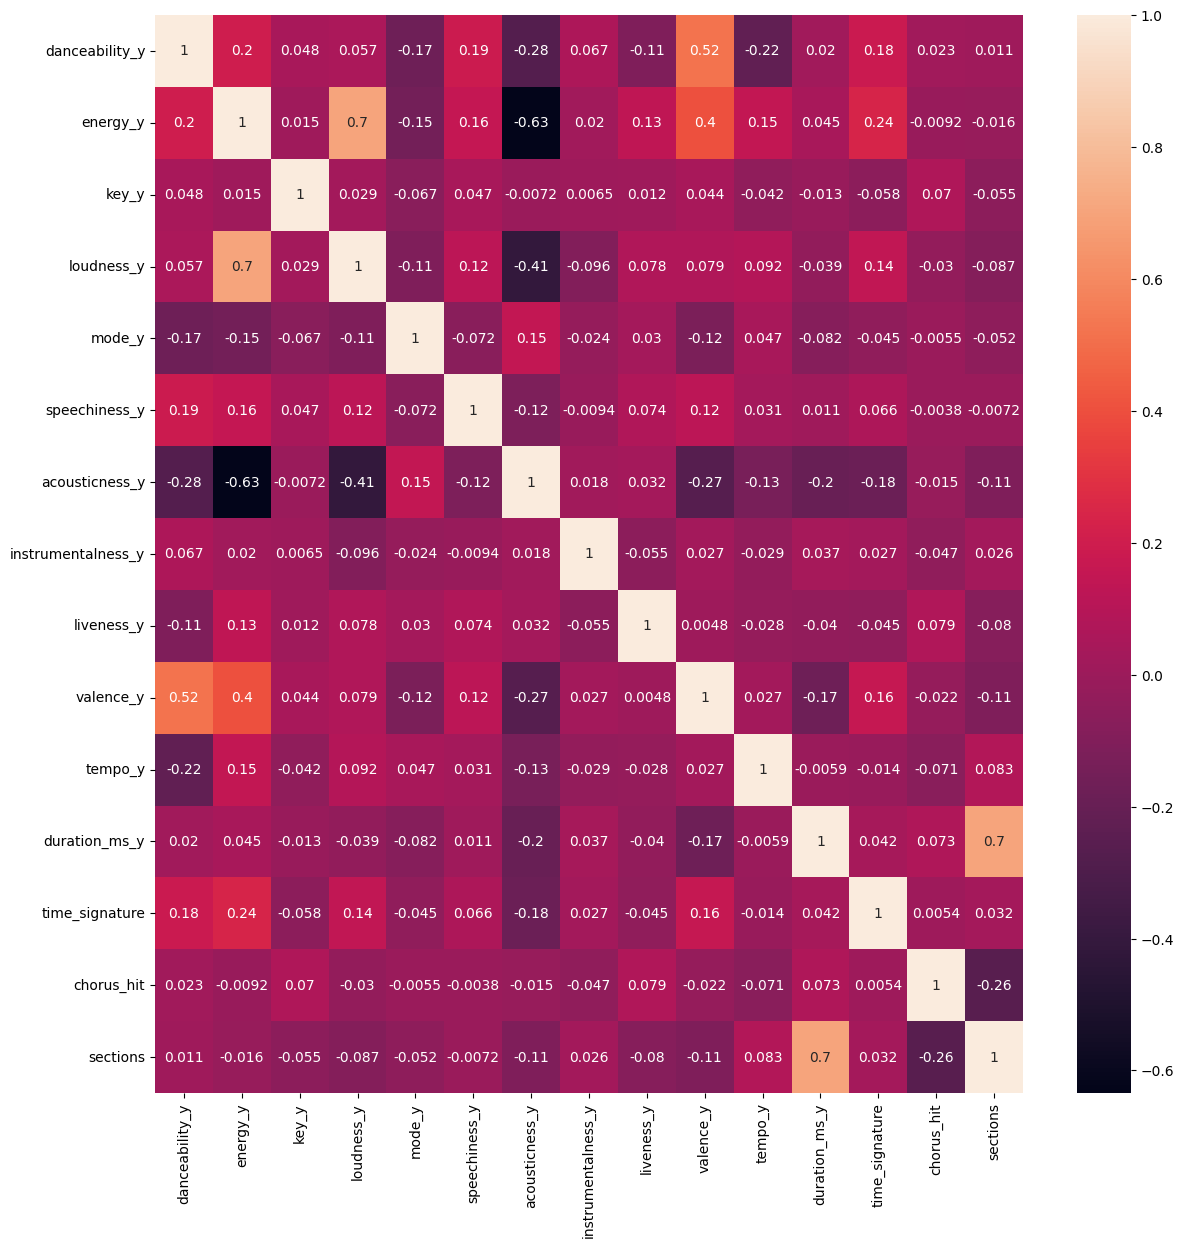

In [20]:
plt.figure(figsize=(14,14))
correl = df.corr()
sns.heatmap(correl,annot=True)

In [21]:
correl

,danceability_y,energy_y,key_y,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,time_signature,chorus_hit,sections
danceability_y,1.000000,0.199428,0.047873,0.057443,-0.168925,0.185438,-0.275179,0.067261,-0.107560,0.516302,-0.220788,0.019796,0.178618,0.022614,0.010681
energy_y,0.199428,1.000000,0.015060,0.703956,-0.149858,0.156236,-0.634217,0.019879,0.134872,0.401448,0.147332,0.045011,0.236684,-0.009233,-0.015802
key_y,0.047873,0.015060,1.000000,0.028691,-0.066507,0.047347,-0.007230,0.006506,0.011595,0.044472,-0.041719,-0.013326,-0.058024,0.070105,-0.055365
loudness_y,0.057443,0.703956,0.028691,1.000000,-0.109480,0.122824,-0.414396,-0.095651,0.077625,0.079129,0.091860,-0.038550,0.143447,-0.029998,-0.087082
mode_y,-0.168925,-0.149858,-0.066507,-0.109480,1.000000,-0.072065,0.145575,-0.024008,0.030051,-0.121867,0.047315,-0.081551,-0.044542,-0.005512,-0.052107
speechiness_y,0.185438,0.156236,0.047347,0.122824,-0.072065,1.000000,-0.116633,-0.009374,0.074435,0.123903,0.031383,0.010660,0.065805,-0.003808,-0.007161
acousticness_y,-0.275179,-0.634217,-0.007230,-0.414396,0.145575,-0.116633,1.000000,0.018318,0.032237,-0.269355,-0.130538,-0.199152,-0.182838,-0.015135,-0.108041
instrumentalness_y,0.067261,0.019879,0.006506,-0.095651,-0.024008,-0.009374,0.018318,1.000000,-0.055205,0.026573,-0.029376,0.037046,0.026606,-0.046511,0.025553
liveness_y,-0.107560,0.134872,0.011595,0.077625,0.030051,0.074435,0.032237,-0.055205,1.000000,0.004841,-0.027621,-0.040194,-0.044538,0.079095,-0.079980
valence_y,0.516302,0.401448,0.044472,0.079129,-0.121867,0.123903,-0.269355,0.026573,0.004841,1.000000,0.027400,-0.174581,0.158557,-0.021715,-0.110206


# Seperative the categorical and numeric features

In [22]:
df.nunique()

lyrics                1116
title                 1092
artist                 593
label                    2
emotion_label            6
uri                   1114
danceability_y         492
energy_y               577
key_y                   12
loudness_y            1070
mode_y                   2
speechiness_y          483
acousticness_y         821
instrumentalness_y     592
liveness_y             589
valence_y              619
tempo_y               1106
duration_ms_y         1069
time_signature           4
chorus_hit            1114
sections                21
Hit_y                    2
dtype: int64

In [23]:
categorical = [x for x in df.columns if df[x].nunique()< 15]

In [24]:
categorical

['label', 'emotion_label', 'key_y', 'mode_y', 'time_signature', 'Hit_y']

In [25]:
index_to_drop = 4  # Index of the entry you want to drop

del categorical[index_to_drop]

categorical # Output: [1, 2, 4, 5]


['label', 'emotion_label', 'key_y', 'mode_y', 'Hit_y']

In [26]:
df = df.drop(['lyrics'], axis=1)

In [27]:
df = df.drop(['title', 'artist', 'uri'], axis=1)

In [28]:
numeric = [x for x in df.columns if df[x].nunique() > 15]

In [29]:
numeric

['danceability_y',
 'energy_y',
 'loudness_y',
 'speechiness_y',
 'acousticness_y',
 'instrumentalness_y',
 'liveness_y',
 'valence_y',
 'tempo_y',
 'duration_ms_y',
 'chorus_hit',
 'sections']

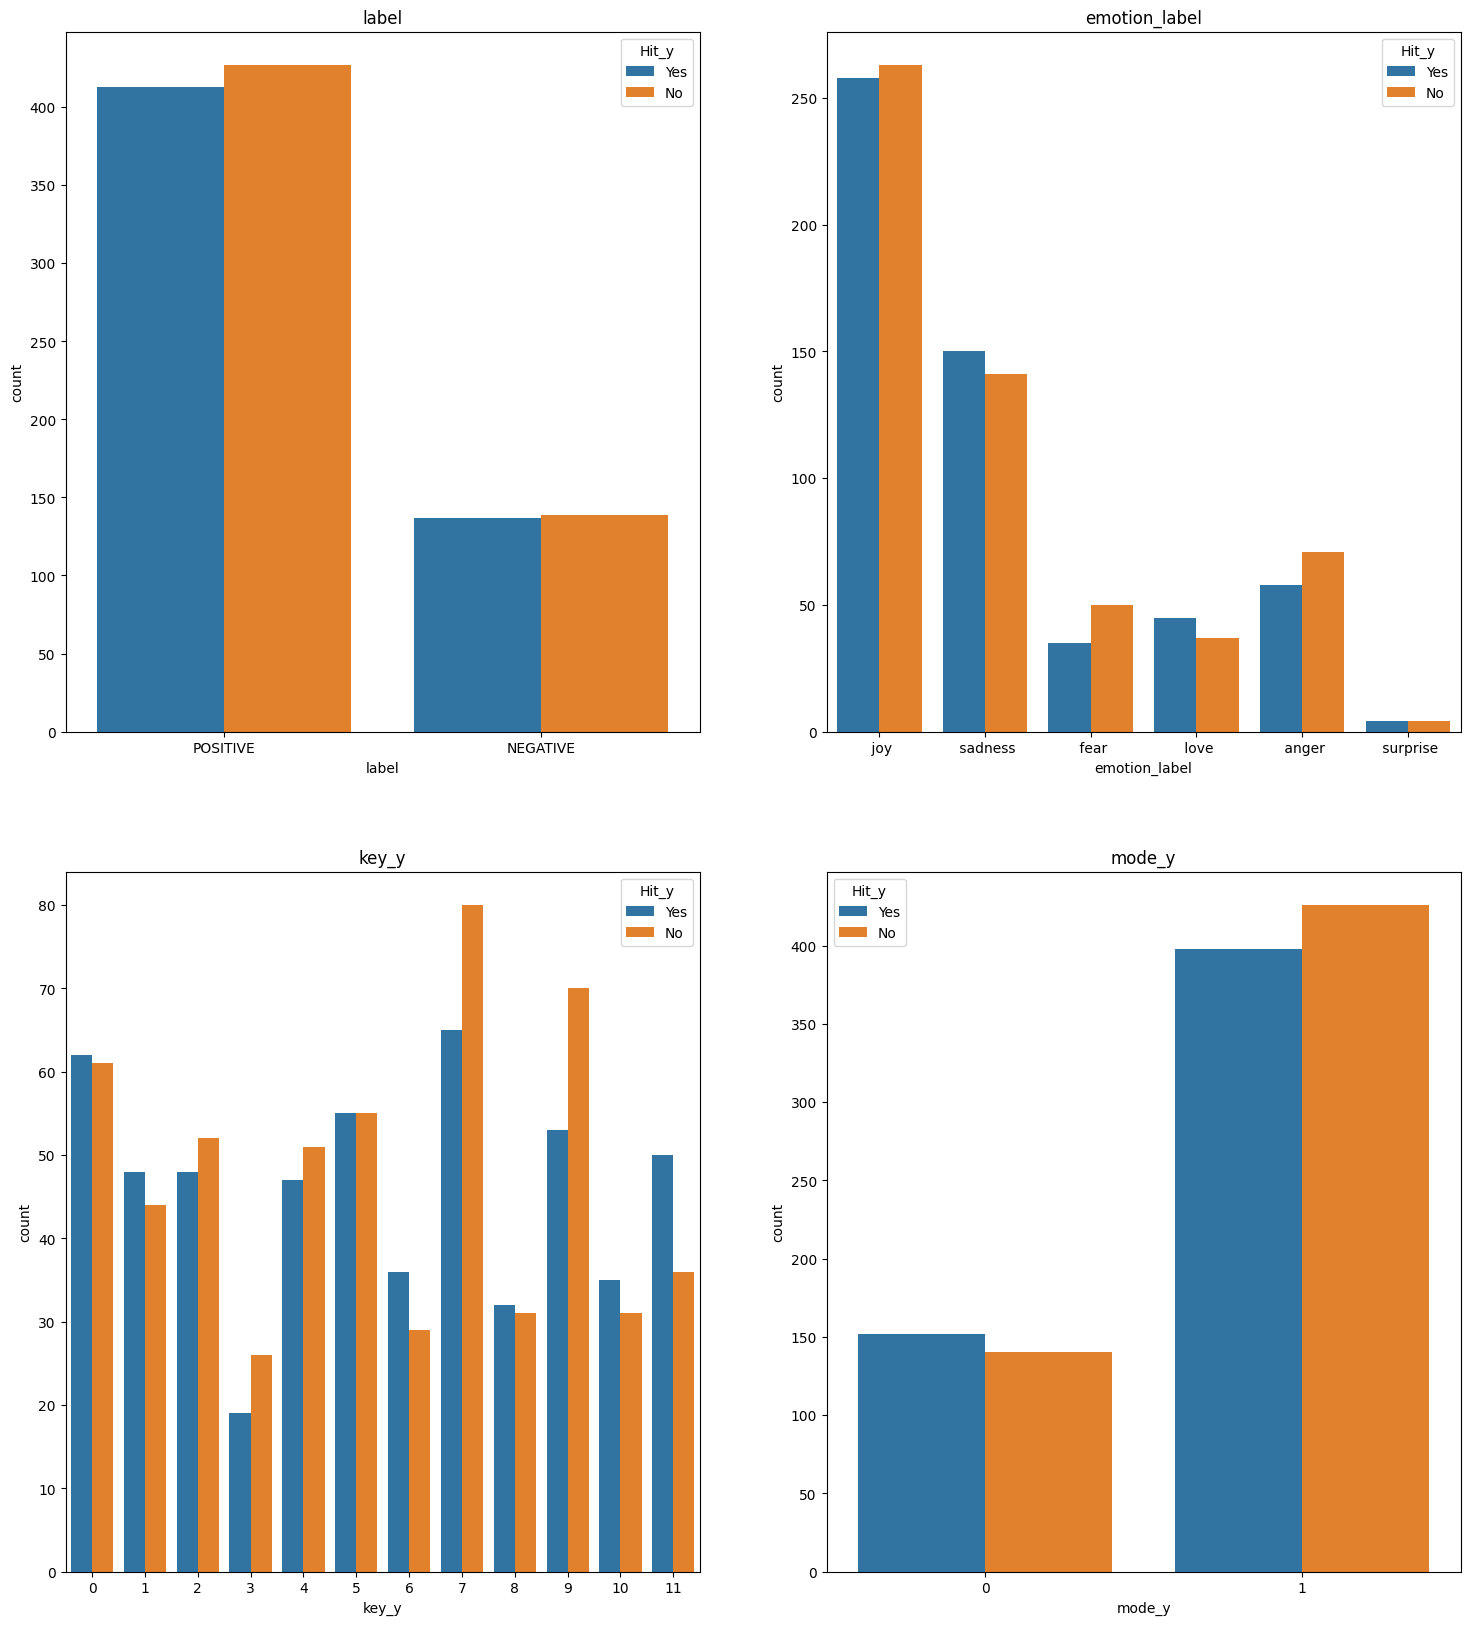

In [30]:
plt.figure(figsize=(18,20))
i = 1
for features in categorical[:-1]:
    plt.subplot(2,2,i)
    sns.countplot(x=df[features],hue=data.Hit_y).set_title(features)
    i=i+1
plt.show()

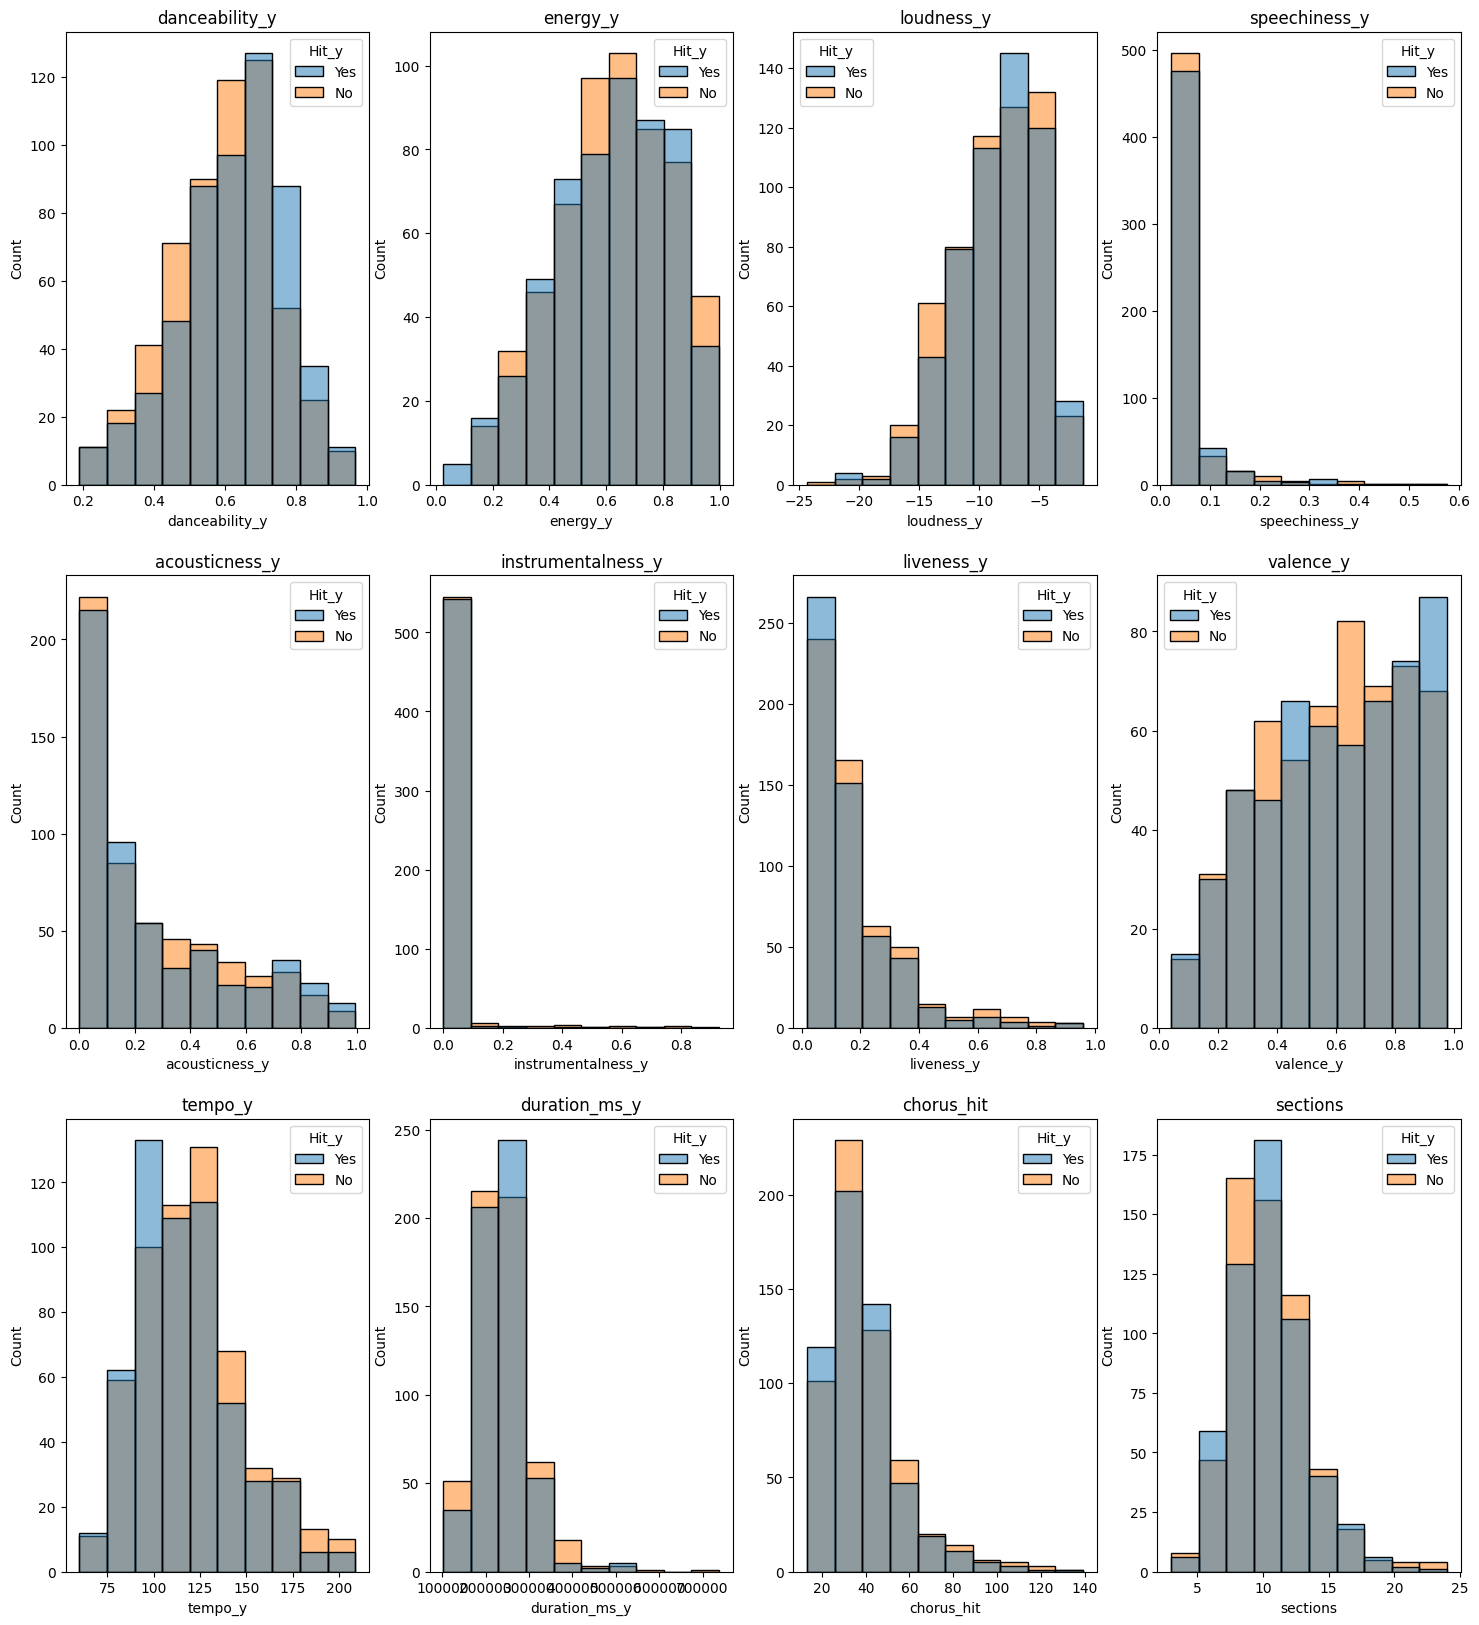

In [31]:
plt.figure(figsize=(18,20))
i = 1
for features in numeric:
    plt.subplot(3,4,i)
    sns.histplot(x=df[features],hue= df.Hit_y, bins=10).set_title(features)
    i=i+1
plt.show()

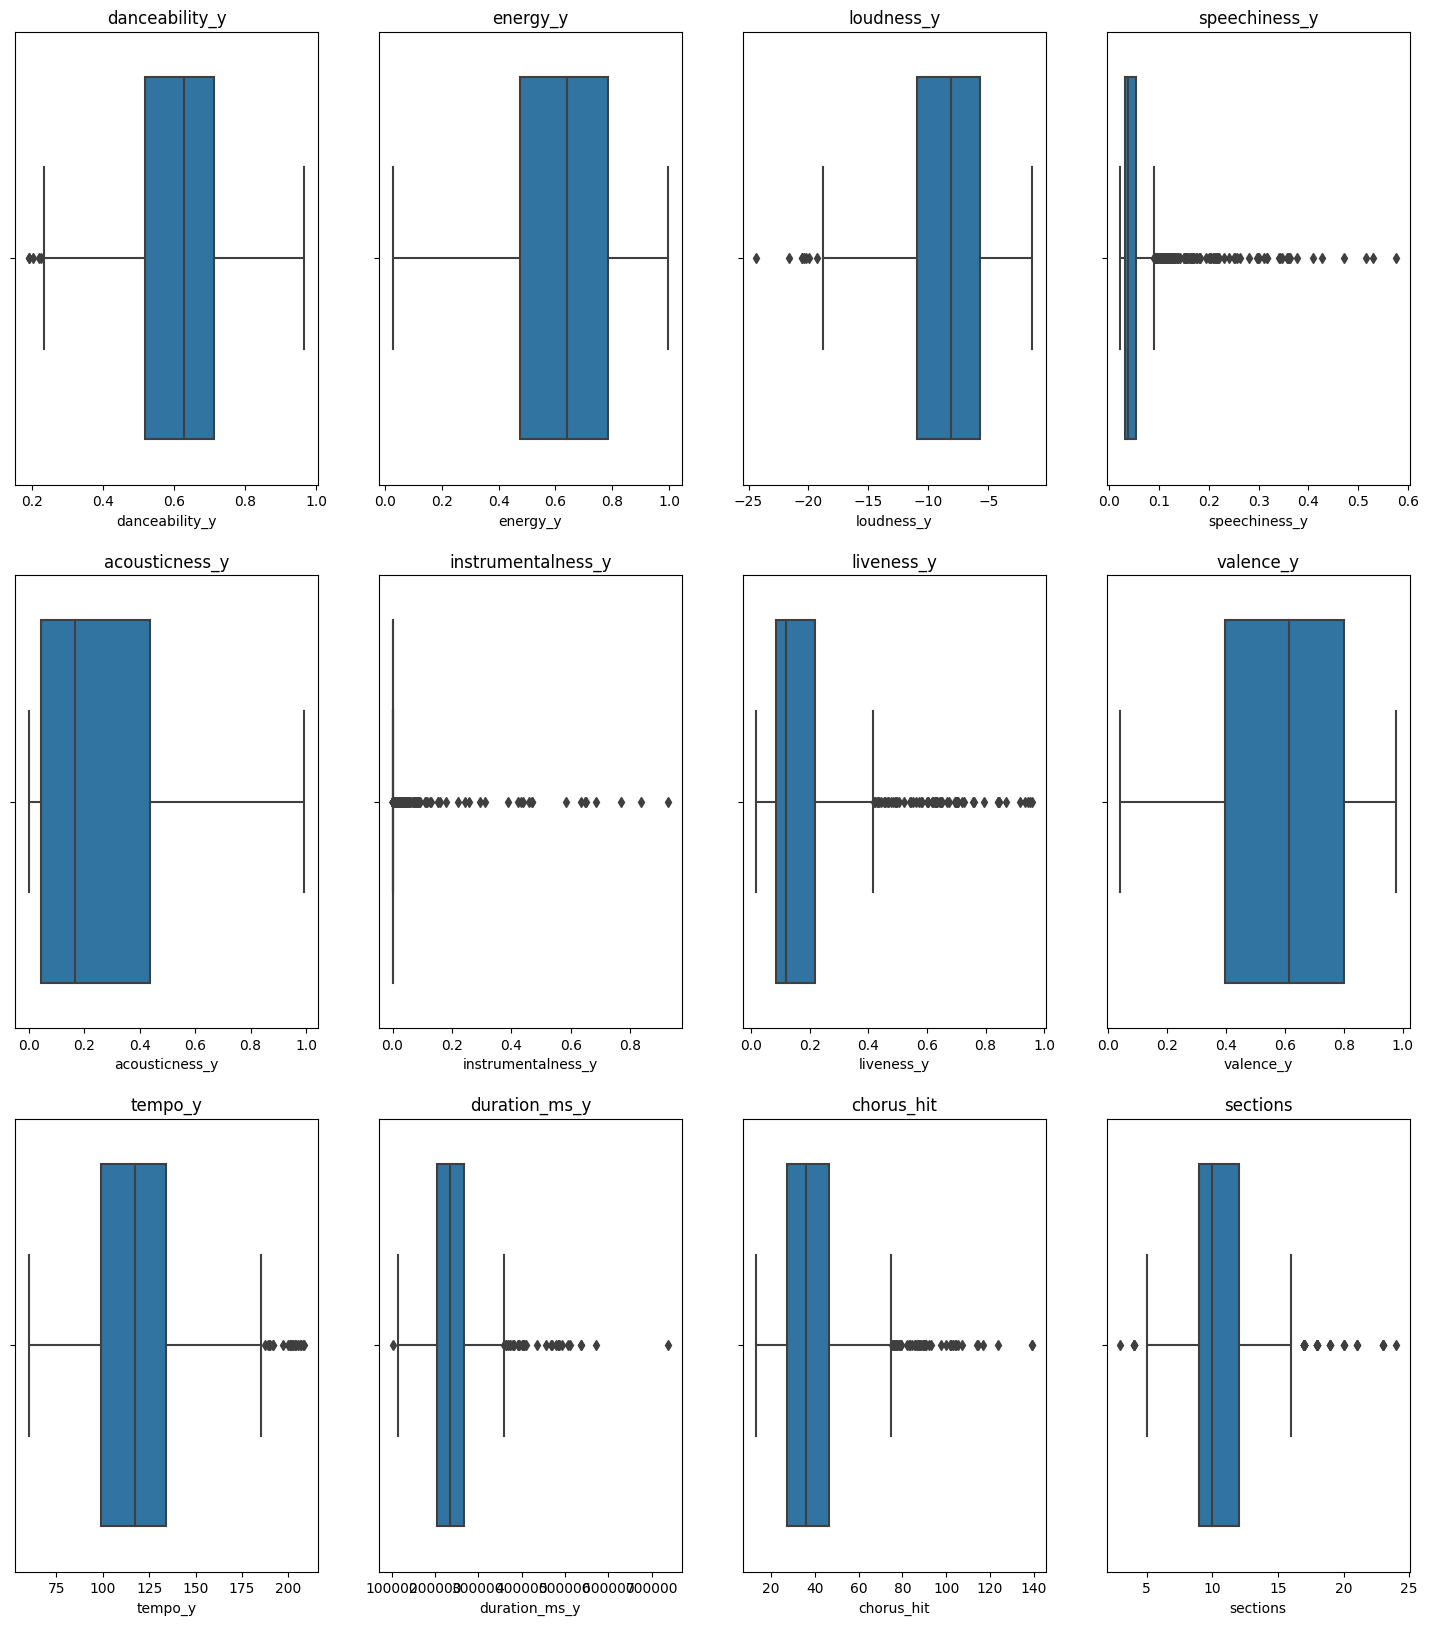

In [32]:
plt.figure(figsize=(18,20))
i = 1
for features in numeric:
    plt.subplot(3,4,i)
    sns.boxplot(x=df[features]).set_title(features)
    i=i+1
plt.show()

# Feature Engineering

## Import Dataset and Preprocessing Steps

In [33]:
import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/sample_two_datasets_hit_column.csv')

In [34]:
df = df.drop(['genre', 'num_syllables', 'pos', 'year', 'fog_index',
       'flesch_index', 'num_lines', 'sentiment','f_k_grade', 'difficult_words', 'num_dupes', 'number_of_tokens',
       'number_of_types', 'decades', 'stemmed_text', 'POS_tags', 'POS','values', 'pred', 'playlistID', 'TrackName',
        'TrackID', 'SampleURL', 'ReleaseYear', 'Genres', 'danceability_x', 'energy_x', 'loudness_x', 'speechiness_x',
       'acousticness_x', 'instrumentalness_x', 'liveness_x', 'valence_x', 'tempo_x', 'key_x', 'mode_x', 'duration_ms_x',
        'Popularity', 'score'], axis=1)

In [35]:
df = df.drop(['Hit_x', 'target'], axis=1)

In [36]:
df.Hit_y = df.Hit_y.replace({'Yes': 1, 'No': 0})

In [37]:
from collections import Counter

Counter(df.Hit_y)

Counter({1: 550, 0: 566})

In [38]:
Counter(df.label)

Counter({'POSITIVE': 840, 'NEGATIVE': 276})

In [39]:
Counter(df.emotion_label)

Counter({' joy': 521,
         ' sadness': 291,
         ' fear': 85,
         ' love': 82,
         ' anger': 129,
         ' surprise': 8})

In [40]:
df = df.drop(['title','artist','uri'],axis=1)

In [41]:
df.columns

Index(['lyrics', 'label', 'emotion_label', 'danceability_y', 'energy_y',
       'key_y', 'loudness_y', 'mode_y', 'speechiness_y', 'acousticness_y',
       'instrumentalness_y', 'liveness_y', 'valence_y', 'tempo_y',
       'duration_ms_y', 'time_signature', 'chorus_hit', 'sections', 'Hit_y'],
      dtype='object')

In [42]:
df['label'] = df['label'].astype("category")

In [43]:
df['emotion_label'] = df['emotion_label'].astype("category")

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   lyrics              1116 non-null   object  
 1   label               1116 non-null   category
 2   emotion_label       1116 non-null   category
 3   danceability_y      1116 non-null   float64 
 4   energy_y            1116 non-null   float64 
 5   key_y               1116 non-null   int64   
 6   loudness_y          1116 non-null   float64 
 7   mode_y              1116 non-null   int64   
 8   speechiness_y       1116 non-null   float64 
 9   acousticness_y      1116 non-null   float64 
 10  instrumentalness_y  1116 non-null   float64 
 11  liveness_y          1116 non-null   float64 
 12  valence_y           1116 non-null   float64 
 13  tempo_y             1116 non-null   float64 
 14  duration_ms_y       1116 non-null   int64   
 15  time_signature      1116 non-null   in

## Preprocessing Text Data

In [45]:
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [46]:
# Assuming you have a 'lyrics' column containing the text data
df['lyrics'] = df['lyrics'].apply(preprocess_text)

## Splitting the data into dependent and independent features

In [47]:
X = df.drop('Hit_y',axis=1)

In [48]:
X.columns

Index(['lyrics', 'label', 'emotion_label', 'danceability_y', 'energy_y',
       'key_y', 'loudness_y', 'mode_y', 'speechiness_y', 'acousticness_y',
       'instrumentalness_y', 'liveness_y', 'valence_y', 'tempo_y',
       'duration_ms_y', 'time_signature', 'chorus_hit', 'sections'],
      dtype='object')

In [49]:
y = df["Hit_y"]

## TF-IDF Vectorizer for Text Data

In [50]:
tfidf_vectorizer = TfidfVectorizer()
X_text = tfidf_vectorizer.fit_transform(X['lyrics'])

## Combine Text & Numeric Features

In [51]:
# Combine Text- & Numeric Features
X_combined = pd.concat([X.drop('lyrics', axis=1), pd.DataFrame(X_text.toarray())], axis=1)

## Training & Testsplit

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.20)

## Model Selection

In [54]:
from xgboost import XGBClassifier

In [55]:
classifier = XGBClassifier(enable_categorical=True, tree_method='hist')

## Import Randomized Search Cross Validation

In [56]:
from sklearn.model_selection import RandomizedSearchCV

## Parameter Selection

In [57]:
params = {
    'learning_rate':[0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'min_child_weight':[1,3,5,7],
    'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

In [58]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)

In [59]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [60]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [61]:
classifier= XGBClassifier(enable_categorical=True, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='hist', validate_parameters=1,
              verbosity=None)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [63]:
cross = cross_val_score(classifier, x_train, y_train, cv=10, verbose=0)

In [64]:
print("Accuracy after cross validation is: {}".format(cross.mean()*100))

Accuracy after cross validation is: 56.71785268414482


# Prediction

In [65]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [66]:
y_pred = classifier.predict(x_test)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59       107
           1       0.61      0.57      0.59       117

    accuracy                           0.59       224
   macro avg       0.59      0.59      0.59       224
weighted avg       0.59      0.59      0.59       224



Text(50.722222222222214, 0.5, 'Actual')

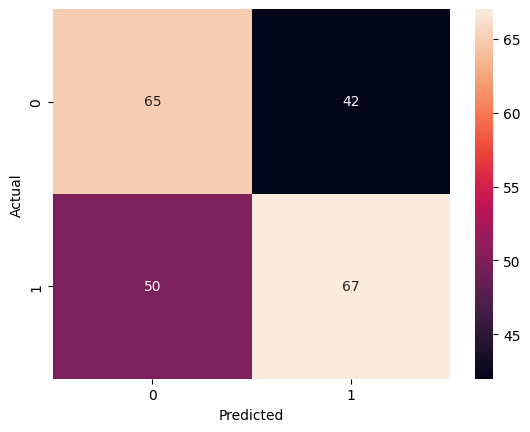

In [68]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature Importance

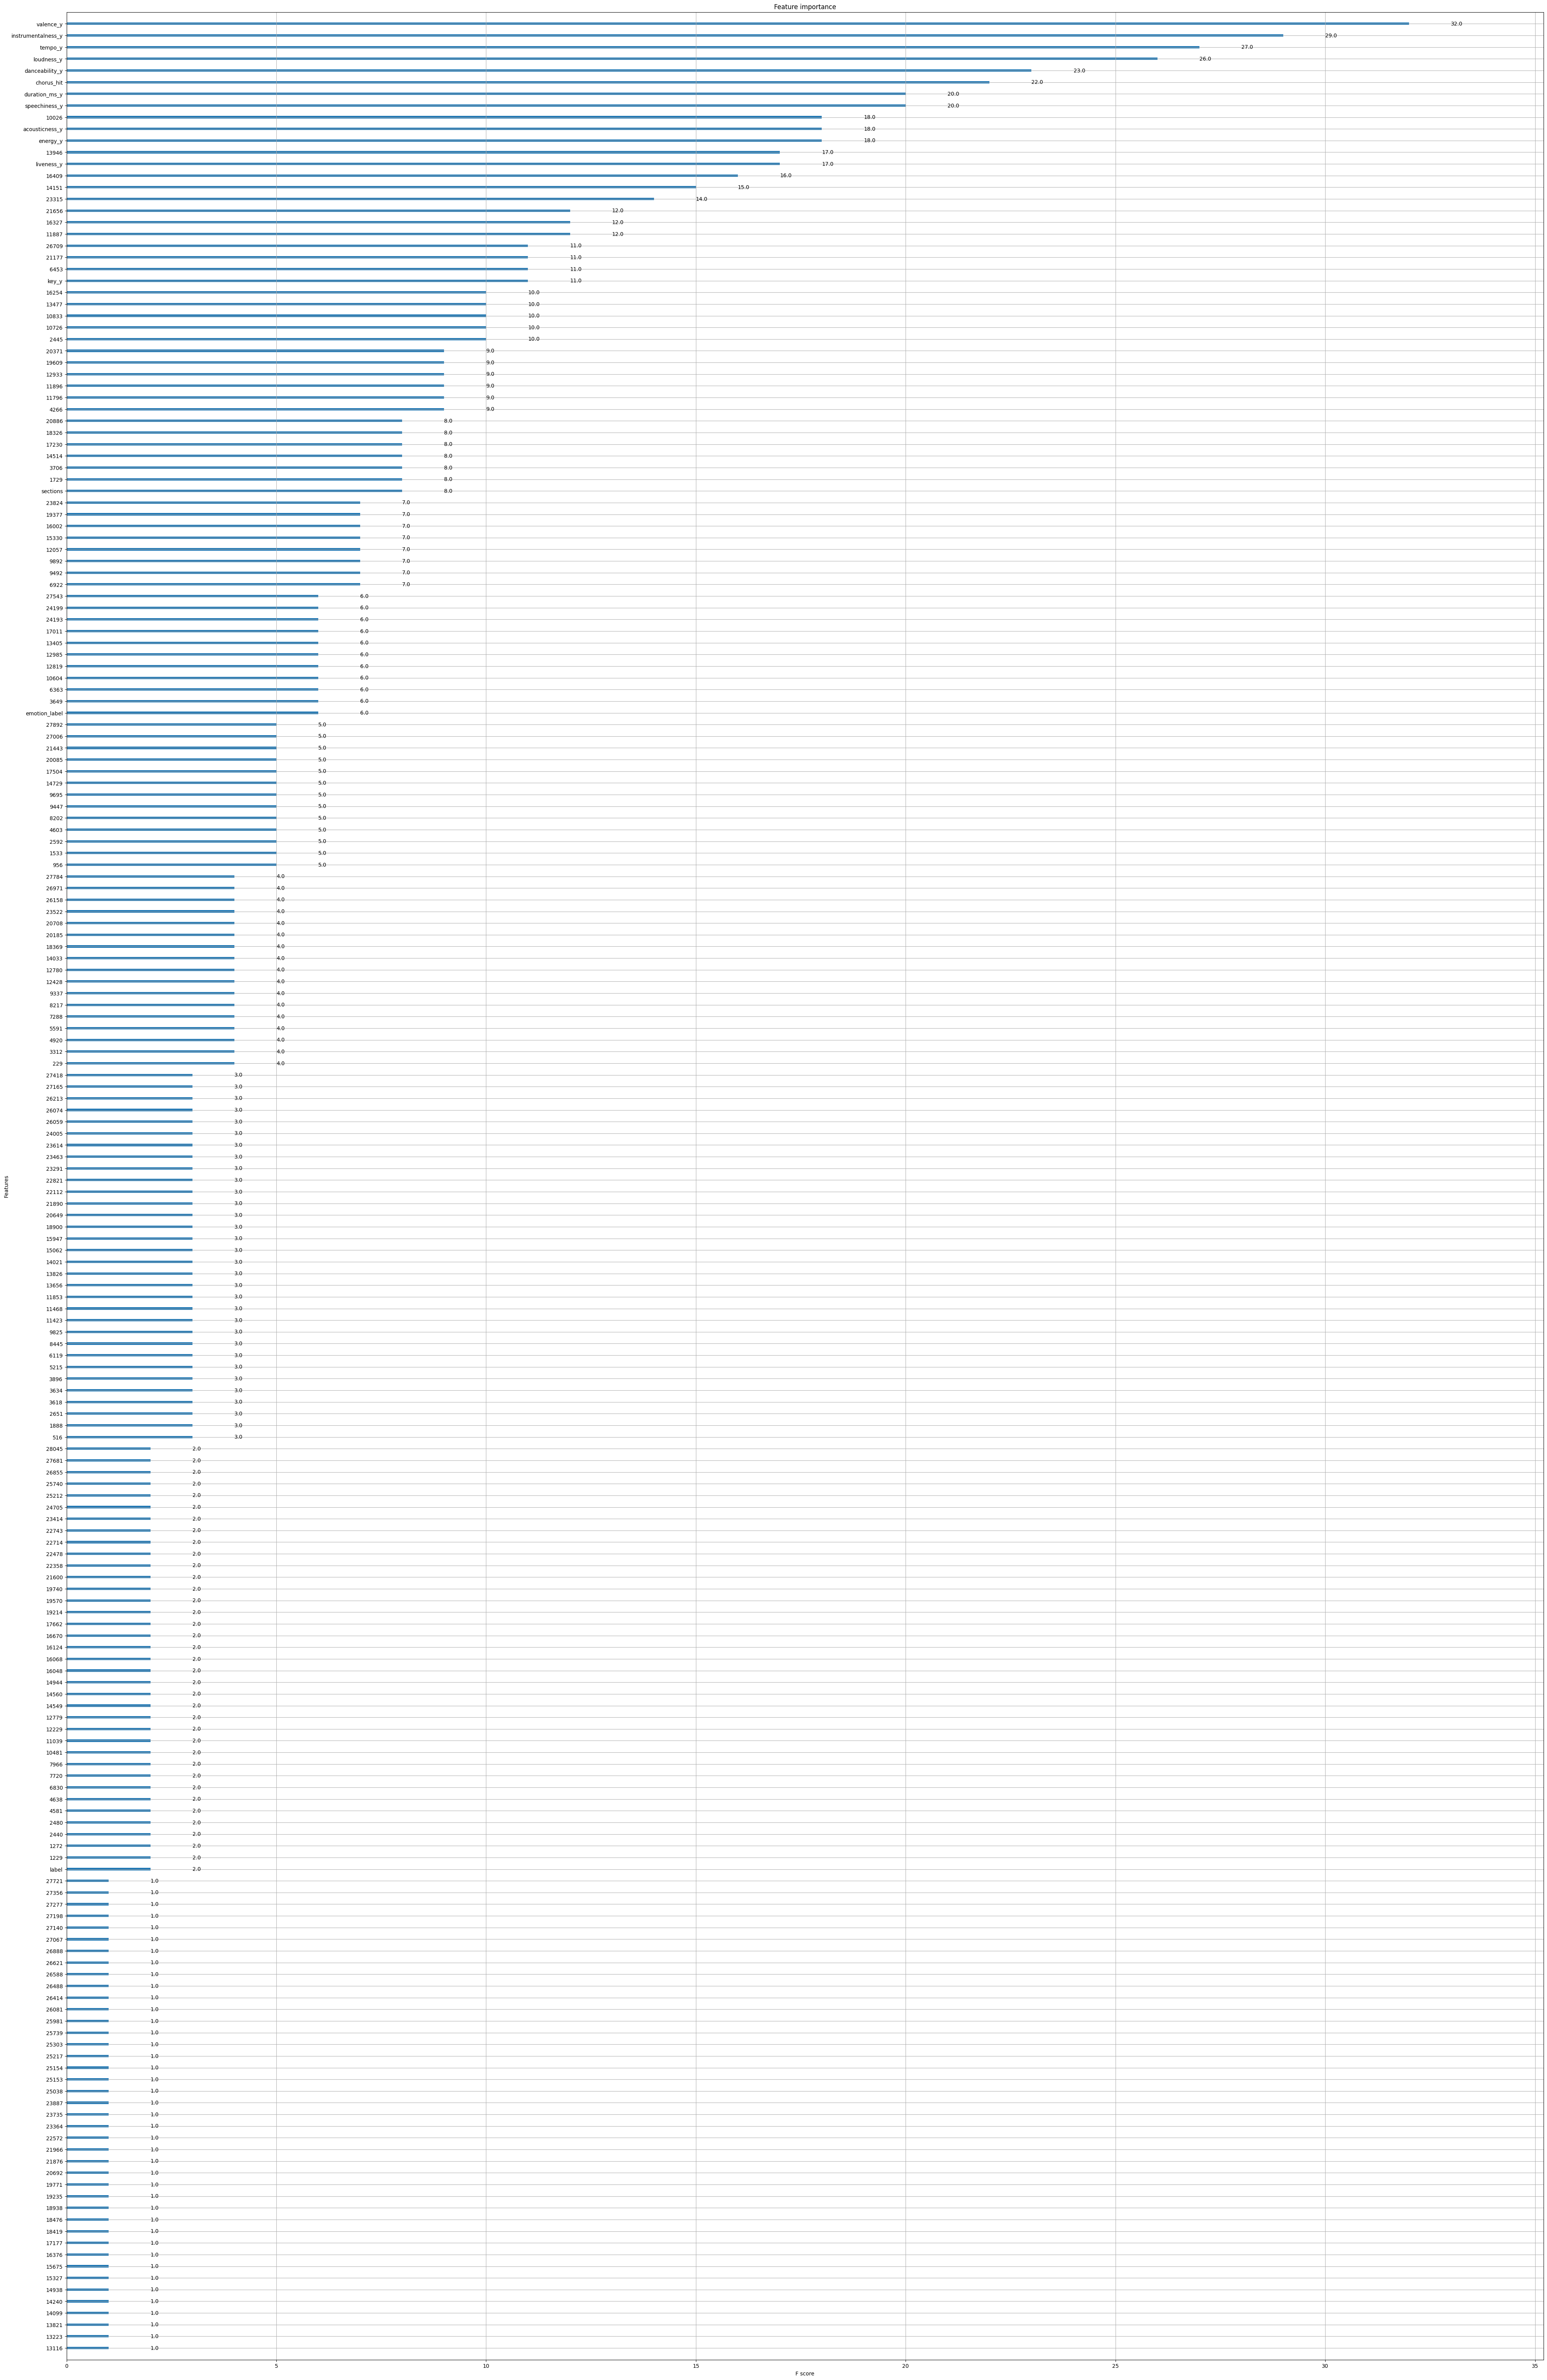

In [104]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(classifier, max_num_features=200)  # Set max_num_features to 5
plt.rcParams['figure.figsize'] = [50, 80]  # Adjust the figure size if needed
plt.show()

# Test with another tree-method

In [72]:
classifier = XGBClassifier(enable_categorical=True, tree_method='gpu_hist')

In [73]:
random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)

In [74]:
random_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [75]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [76]:
classifier= XGBClassifier(enable_categorical=True, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [78]:
cross = cross_val_score(classifier, x_train, y_train, cv=10, verbose=0)

In [79]:
print("Accuracy after cross validation is: {}".format(cross.mean()*100))

Accuracy after cross validation is: 56.278401997503124


# Prediction

In [80]:
classifier.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy=None, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
              max_depth=5, max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [81]:
y_pred = classifier.predict(x_test)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.61      0.60       107
           1       0.63      0.61      0.62       117

    accuracy                           0.61       224
   macro avg       0.61      0.61      0.61       224
weighted avg       0.61      0.61      0.61       224



Text(45.722222222222214, 0.5, 'Actual')

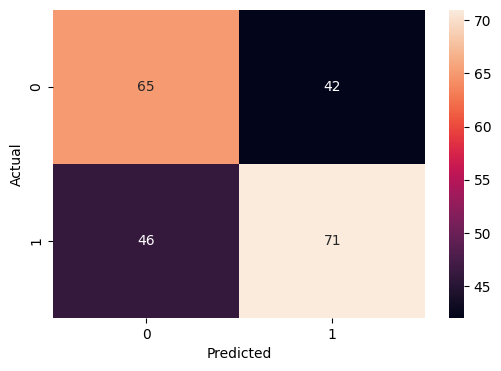

In [83]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="g")
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature Importance

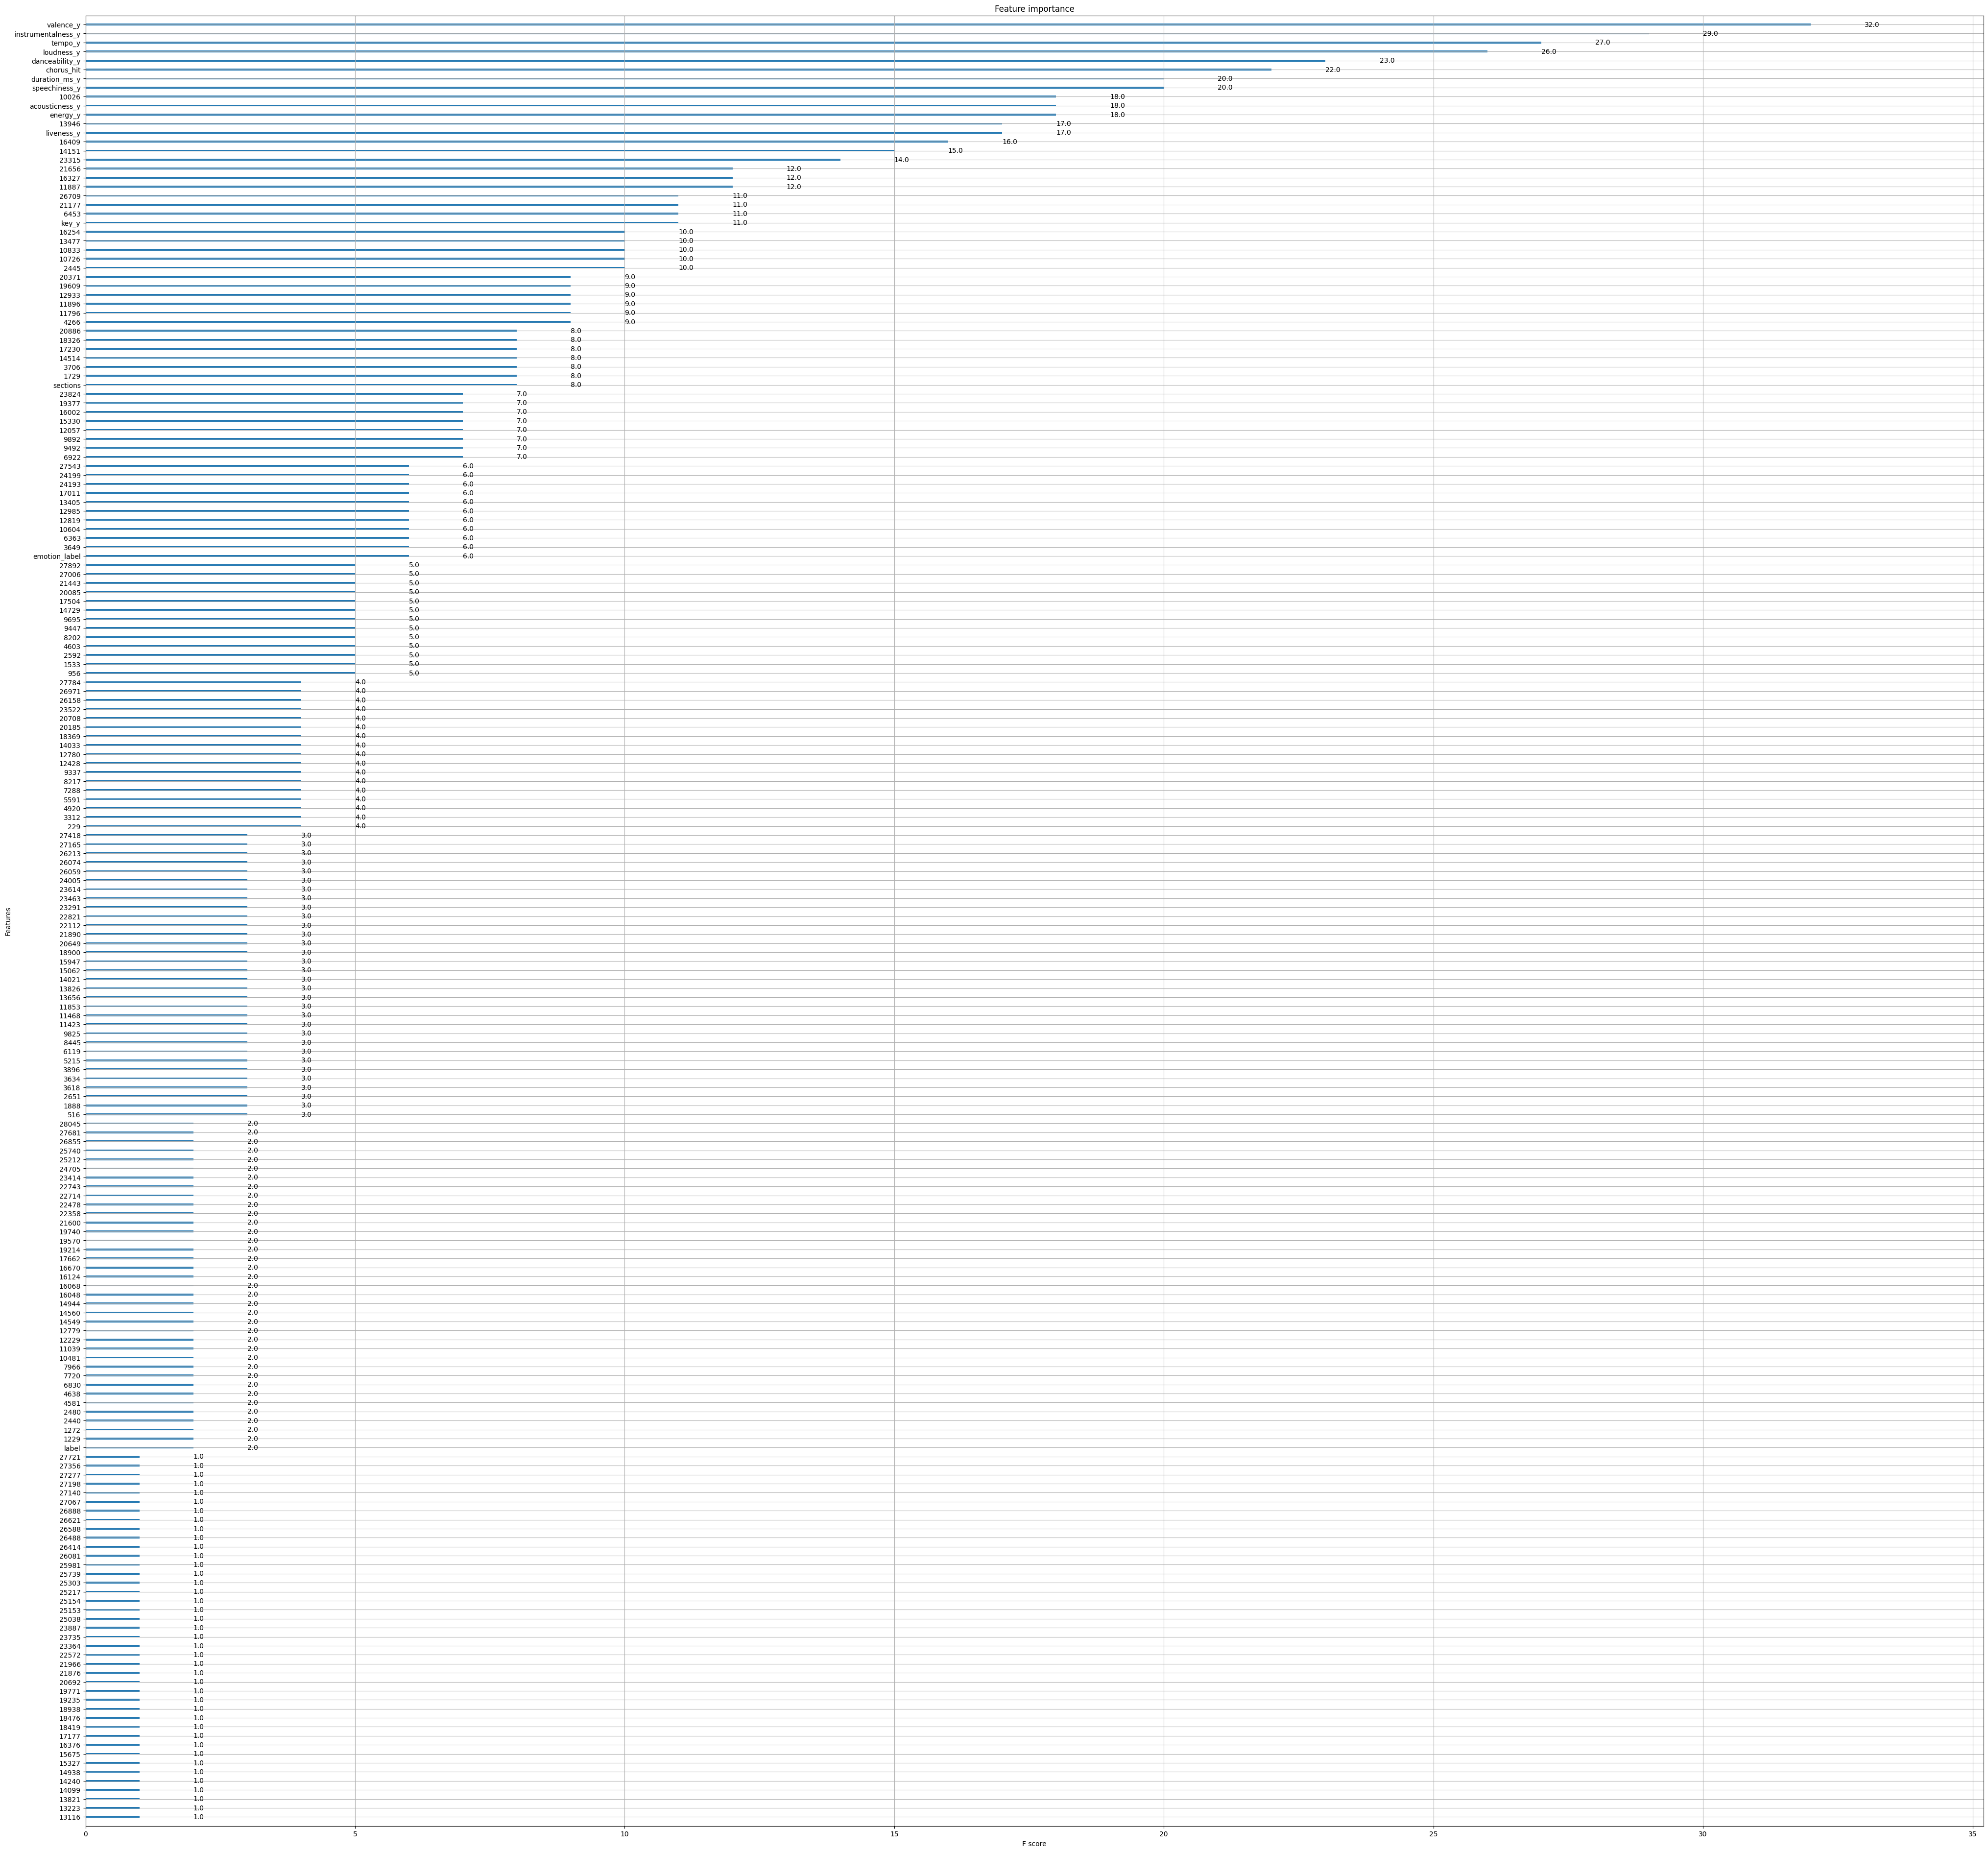

In [90]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(classifier, max_num_features=200)  # Set max_num_features to 5
plt.rcParams['figure.figsize'] = [100, 98]  # Adjust the figure size if needed
plt.show()